In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets
from time import time

read = pd.read_csv("sub_dataset/5_beers.csv")
read = read[["brewery_name", 
            "review_overall", 
            "review_aroma", 
            "review_appearance", 
            "beer_style", 
            "review_palate",
            "review_taste",
            "beer_name",
            "beer_abv"]]

#print read[:10]
reviews = read.as_matrix()
print reviews[:10]

[['Vecchio Birraio' 1.5 2.0 2.5 'Hefeweizen' 1.5 1.5 'Sausa Weizen' 5.0]
 ['Vecchio Birraio' 3.0 2.5 3.0 'English Strong Ale' 3.0 3.0 'Red Moon' 6.2]
 ['Vecchio Birraio' 3.0 2.5 3.0 'Foreign / Export Stout' 3.0 3.0
  'Black Horse Black Beer' 6.5]
 ['Vecchio Birraio' 3.0 3.0 3.5 'German Pilsener' 2.5 3.0 'Sausa Pils' 5.0]
 ['Caldera Brewing Company' 4.0 4.5 4.0 'American Double / Imperial IPA'
  4.0 4.5 'Cauldron DIPA' 7.7]
 ['Caldera Brewing Company' 3.0 3.5 3.5 'Herbed / Spiced Beer' 3.0 3.5
  'Caldera Ginger Beer' 4.7]
 ['Caldera Brewing Company' 3.5 3.5 3.5 'Herbed / Spiced Beer' 4.0 4.0
  'Caldera Ginger Beer' 4.7]
 ['Caldera Brewing Company' 3.0 2.5 3.5 'Herbed / Spiced Beer' 2.0 3.5
  'Caldera Ginger Beer' 4.7]
 ['Caldera Brewing Company' 4.0 3.0 3.5 'Herbed / Spiced Beer' 3.5 4.0
  'Caldera Ginger Beer' 4.7]
 ['Caldera Brewing Company' 4.5 3.5 5.0 'Herbed / Spiced Beer' 4.0 4.0
  'Caldera Ginger Beer' 4.7]]


In [4]:
#reducción de dimensionalidad con PCA
from sklearn.decomposition import PCA

#print reviews[:int(100),[1,2,3,5,6,8]]

pca = PCA(n_components=2)
pca.fit(reviews[:int(100),[1,2,3,5,6,8]])
X = pca.transform(reviews[:int(100),[1,2,3,5,6,8]])

In [5]:
print X[:10]

[[ 4.41550235 -1.56807202]
 [ 1.9238352  -0.3172329 ]
 [ 1.68779771 -0.50029579]
 [ 2.79352701  0.57918247]
 [-1.00948196  1.05346466]
 [ 2.59502586  1.27840651]
 [ 1.98664923  1.99591177]
 [ 3.20501057  0.59820325]
 [ 2.16488211  1.86366699]
 [ 1.36852026  2.88457865]]


100
Tiempo promedio:  0.0017724831899 [s]


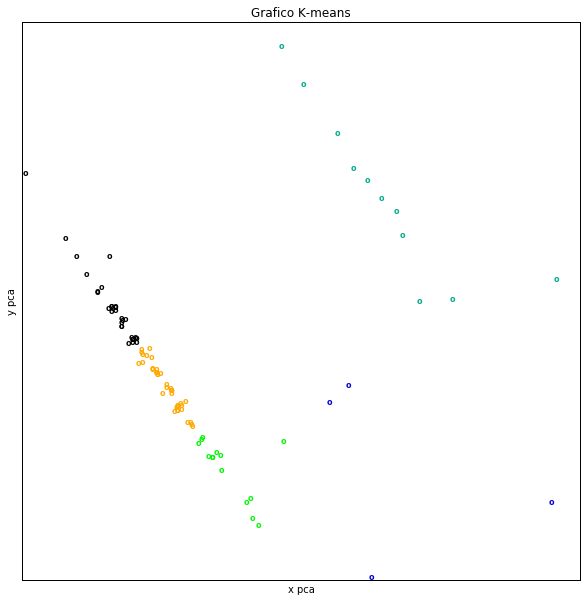

In [10]:
#K-means
from sklearn.cluster import KMeans

tiempo = 0

#Vizualitation
fig = plt.figure(figsize = (10,10))


start_time = time()

k_means = KMeans(init="k-means++", n_clusters = 5, n_init = 2)#, tol=0.0001, max_iter=30) 5 
k_means.fit(X)

final_time = time() - start_time
tiempo += final_time
k_means_labels = k_means.labels_
    
x_min, x_max = np.min(X, axis = 0), np.max(X, axis = 0)
X = (X - x_min) / (x_max - x_min)

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("x pca")
ax.set_ylabel("y pca")
plt.title("Grafico K-means" )
ax.set_xticks(())
ax.set_yticks(())
ax.axis([0, 1.05, 0, 1.05])

#Visualitation (in 2D).
print X.shape[0]
for j in range(X.shape[0]):
    plt.text(X[j,0], X[j,1], "o",
    color=plt.cm.spectral(k_means_labels[j]/5.1),
    fontdict={'weight': 'bold', 'size': 8})

print "Tiempo promedio: ", tiempo/6,"[s]"
plt.show()